In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


In [ ]:
dt = pd.read_csv('FuelConsumptionCo2.csv')
dt

In [95]:
dt.head(8)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255


In [ ]:
#dt.loc[[2,4,5,6],['ENGINESIZE','CYLINDERS','FUELTYPE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
dt.loc[:34,['ENGINESIZE','CYLINDERS','FUELTYPE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]

In [ ]:
dt.describe()

In [ ]:
print(dt.mode())
#print(dt.mean())
#print(dt.std())
print(dt.max())
print(dt.min())

In [99]:
print(dt.isnull())
print(dt.isnull().sum())

      MODELYEAR   MAKE  MODEL  VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0         False  False  False         False       False      False   
1         False  False  False         False       False      False   
2         False  False  False         False       False      False   
3         False  False  False         False       False      False   
4         False  False  False         False       False      False   
...         ...    ...    ...           ...         ...        ...   
1062      False  False  False         False       False      False   
1063      False  False  False         False       False      False   
1064      False  False  False         False       False      False   
1065      False  False  False         False       False      False   
1066      False  False  False         False       False      False   

      TRANSMISSION  FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0            False     False                 False                False   
1        

In [100]:
dt_dup = pd.concat([dt,dt])
dt_dup.duplicated()
dt_dup

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [101]:
dt_dup.drop_duplicates()
#dt_dup.duplicated()
dt_dup

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [102]:
dt_dup.drop_duplicates(inplace=True)
dt_dup.duplicated()
dt_dup


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


<function matplotlib.pyplot.show(close=None, block=None)>

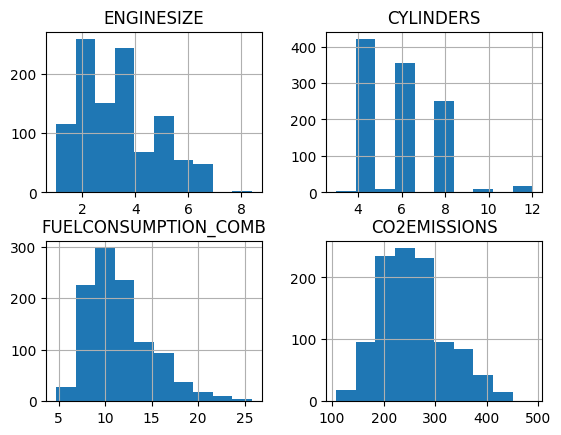

In [129]:
vis = dt[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
vis.hist()
plt.show

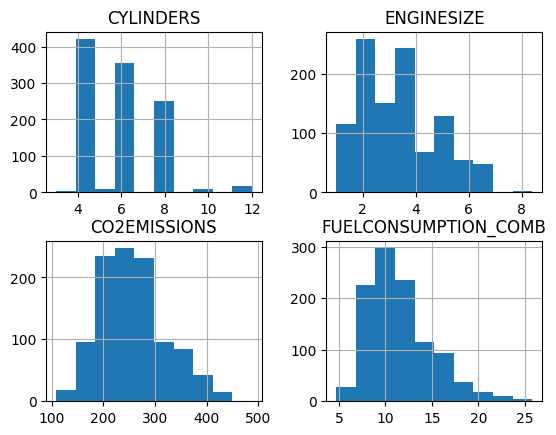

In [131]:
viz = vis[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

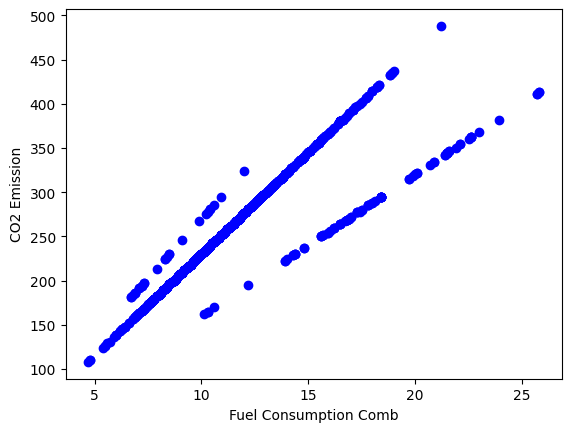

In [133]:
plt.scatter(vis.FUELCONSUMPTION_COMB, vis.CO2EMISSIONS, color = 'blue')
plt.xlabel('Fuel Consumption Comb')
plt.ylabel('CO2 Emission')
plt.show()

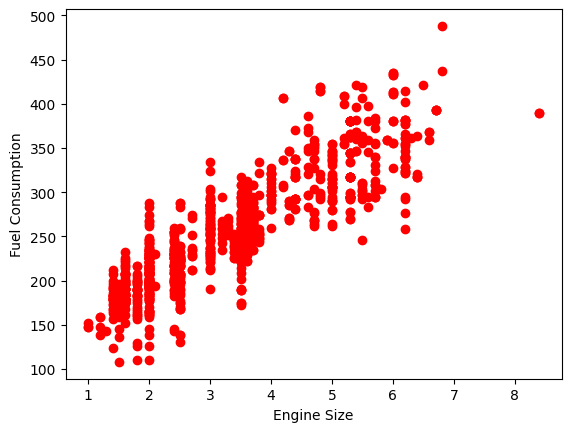

In [132]:
plt.scatter(dt.ENGINESIZE, vis.CO2EMISSIONS, color ='red')
plt.xlabel('Engine Size')
plt.ylabel('Fuel Consumption')
plt.show()

In [156]:
msk = np.random.rand(len(dt)) < 0.8
train = vis[msk]
test = vis[~msk]

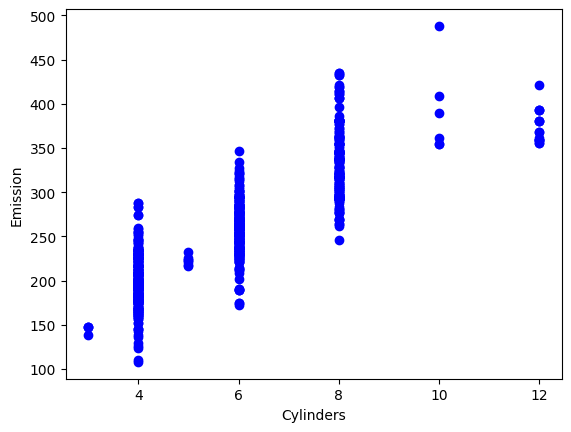

In [157]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

In [165]:
mod = LinearRegression()
train_x = np.asanyarray([train['CYLINDERS']])
train_y = np.asanyarray([train['CO2EMISSIONS']])
mod.fit(train_x,train_y)
print('Coefficients: ',mod.coef_)
print('Intercept: ',mod.intercept_)

Coefficients:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Intercept:  [196. 136. 244. 230. 232. 255. 267. 212. 225. 359. 359. 338. 354. 338.
 354. 359. 202. 230. 214. 235. 251. 224. 258. 224. 258. 227. 258. 288.
 361. 230. 239. 258. 212. 246. 304. 294. 336. 407. 354. 336. 407. 354.
 409. 306. 290. 262. 285. 267. 281. 292. 209. 209. 237. 297. 356. 320.
 380. 322. 380. 380. 200. 202. 181. 181. 193. 200. 209. 209. 209. 221.
 230. 228. 237. 232. 193. 200. 209. 230. 228. 237. 202. 213. 232. 246.
 281. 292. 232. 292. 292. 356. 191. 214. 212. 292. 292. 338. 317. 338.
 317. 338. 317. 338. 317. 209. 260. 230. 253. 255. 320. 370. 274. 324.
 209. 200. 278. 253. 278. 196. 264. 264. 264. 189. 246. 189. 225. 218.
 235. 207. 251. 232. 260. 262. 232. 248. 248. 260. 294. 253. 260. 255.
 262. 382. 382. 340. 382. 338. 322. 377. 354. 283. 294. 262. 271. 290.
 258. 294. 292. 382. 340. 276. 202. 

Text(0, 0.5, 'Co2 Emission')

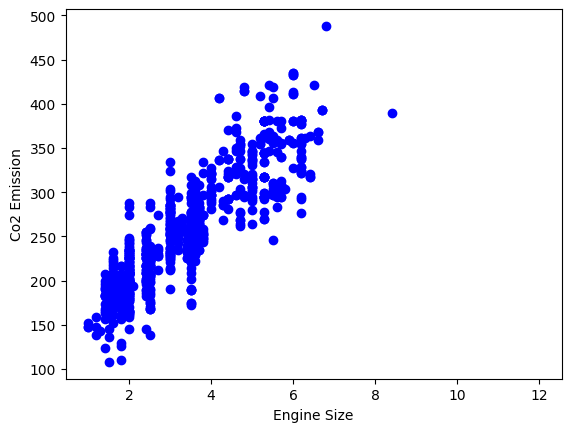

In [166]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x,model.coef_[0][0]*train_x + mod.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')

In [168]:
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = mod.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

ValueError: X has 1 features, but LinearRegression is expecting 846 features as input.